
## K Nearest Neighbors applied to MNIST data    

#### Background of KNN algorithm   

The K Nearest Neighbors (KNN) algorithm is an adaptation of the k-means clustering algorithm. To this end it functions as its predecessor in most ways. The difference is instead taking the distance from one node and comparing its distance to all other nodes, it only uses the k points whose distance is the least to assign its class label. This causes the algorithm to run more efficiently since it has far fewer checks that need to be performed. It still has the strength of the k-means clustering algorithm however in that it is unsupervised and can be used for both classification and regression.   




In [200]:
import sys
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import mnist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import datasets, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize


#### Model Choice    

The data is split into a training set of 60,000 entries and a test set of 10,000 entries. Each of these entries is a 28*28 matrix corresponding to a greyscale image of a handwritten number. In order to properly utilize the KNN algorithm this is flattened into an array of length 784 consisting of pairs of matrix entries. This test split was chosen since the number of features is so large, the amount of training data needed is also higher. Since we are not using a portion of the data for validation then the 15% of data that would have been used for that process was added to the training data instead. 



In [201]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


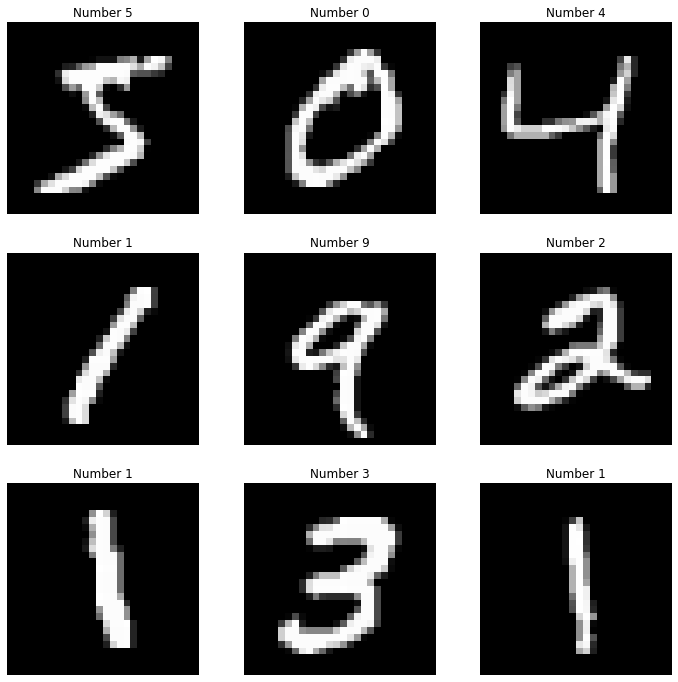

In [202]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.imshow(X_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure
plt.show()

In [203]:
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)
print(X_train.shape)

(60000, 784)


In [204]:
def skl_knn(k, test_data, test_target, stored_data, stored_target):
    """k: number of neighbors to use in classication
    test_data: the data/targets used to test the classifier
    stored_data: the data/targets used to classify the test_data
    """
    
    classifier = KNeighborsClassifier(n_neighbors=k)  
    classifier.fit(stored_data, stored_target)

    y_pred = classifier.predict(test_data) 

    print(classification_report(test_target, y_pred))
    
    fig, ax = plt.subplots(figsize=(15, 15))
    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
    disp.plot(ax=ax)



              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



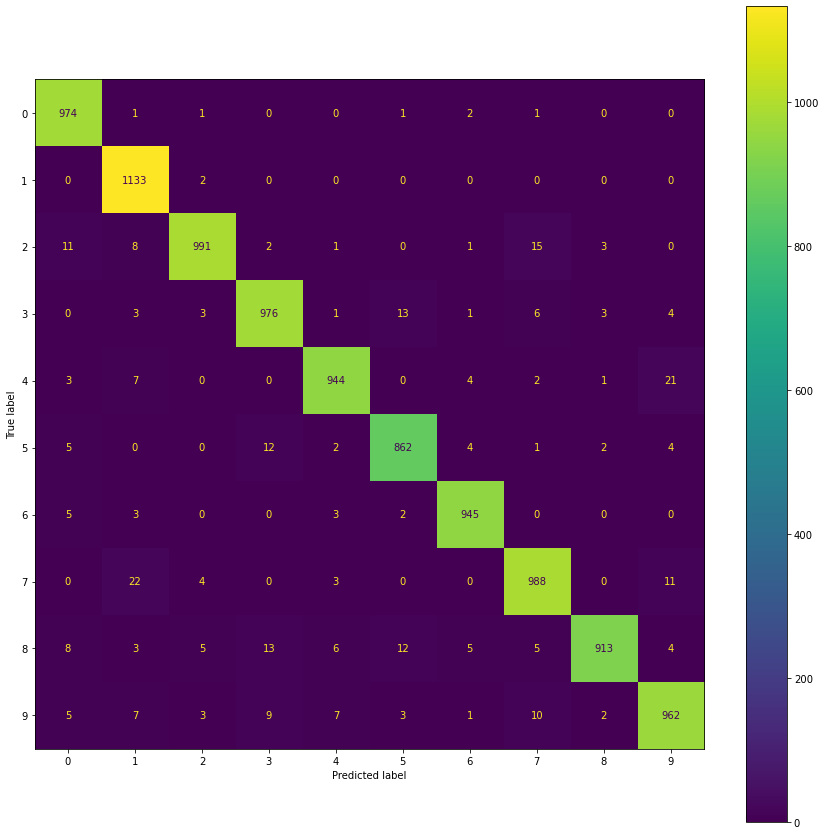

In [205]:
skl_knn(5, X_test, y_test, X_train, y_train)

#### Use of a Classification Matrix.   

The classification matrix is a useful tool when analyzing the overall success of a model. Due to the layout of the matrix, you can see the predictions as well as the true values all in one view. This is very useful as it shows not only the overall success of the model in terms of correct predictions on the diagonal, but also the mislabeled entries.    
Since you can see what the predicted label was in relation to the true label, you can see if there are any specific problem areas within your model. For example, in the MNIST data the difference between a 3 and an 8 can be subtle. A classification matrix shows not only the overall accuracy of a model, but also if there is a high number of 3’s that are misclassified as 8’s or vice-versa. This increased granularity is a useful tool in gauging the overall success of a ML model.


#### Use of an ROC Curve.    

An ROC curve is informative as it is a plot of the true positive rate on the y axis versus the false positive rates on the x axis. The combination of these two shows on the plot where the optimal threshold can be set in order to maximize the trade off of sensitivity versus specificity. These two metrics are important since they give more accurate representations of a models overall performance than accuracy does. If the data you are operating on has very few instances, for example malicious files in a system, then reporting them all negative will still have high accuracy. This is why it is important to use the sensitivity and specificity of a model as measures instead. 
The AUC of this curve is also an important metric that the graph gives. The AUC is a representation of the overall performance of the model over all possible classification thresholds. It is also a scale-invariant metric which shows how predictions are ranked, rather than absolute values. As well as being independent of the threshold, giving the same value no matter which threshold is chosen. This makes it a useful tool in order to test a models performance.




## Works Cited.    


Google. (n.d.). Classification: Roc curve and AUC &nbsp;|&nbsp; machine learning crash course. Google. Retrieved November 11, 2021, from https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc. 

Kang, C. (2020, October 26). K-means clustering for imagery analysis. Chan`s Jupyter. Retrieved November 11, 2021, from https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html. 

K-nearest neighbor classification mnist ... - youtube. (n.d.). Retrieved November 11, 2021, from https://www.youtube.com/watch?v=ooQtUaCExa8. 

Everett, S. (2020, September 29). Building &amp; improving a K-nearest neighbors algorithm in Python. Medium. Retrieved November 11, 2021, from https://towardsdatascience.com/building-improving-a-k-nearest-neighbors-algorithm-in-python-3b6b5320d2f8. 

Mnist handwritten number identification. David Burn. (n.d.). Retrieved November 11, 2021, from https://davidburn.github.io/notebooks/mnist-numbers/MNIST%20Handwrititten%20numbers/. 

samueleverett01. (n.d.). K-nearest-neighbors-image-classifier/cosine-similarity model analysis-checkpoint.ipynb at master · samueleverett01/K-nearest-neighbors-image-classifier. GitHub. Retrieved November 11, 2021, from https://github.com/samueleverett01/K-Nearest-Neighbors-Image-Classifier/blob/master/.ipynb_checkpoints/Cosine-Similarity%20Model%20Analysis-checkpoint.ipynb. 